In [23]:
def remove_noise():
    from PIL import Image 
    img = Image.open('captua.jpg')

    import cv2

    img = cv2.imread('captua.jpg')
    dst = cv2.fastNlMeansDenoisingColored(img, None, 30, 30, 7, 20)

    ret, thresh = cv2.threshold(dst,127,255,cv2.THRESH_BINARY_INV)
    img_arr = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)
    img_arr[:, 5:115] = 0

    import numpy as np
    from sklearn.preprocessing import binarize

    imagedata = np.where(img_arr == 255)
    x = np.array([imagedata[1]])
    y = 45 - imagedata[0]

    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import LinearRegression

    poly_reg = PolynomialFeatures(degree=2)
    x_ = poly_reg.fit_transform(x.T)
    regr = LinearRegression()
    regr.fit(x_, y)

    x2 = np.array([[i for i in range(0, 119)]])
    x2_ = poly_reg.fit_transform(x2.T)


    newimg = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)

    for ele in np.column_stack([regr.predict(x2_).round(0), x2[0],]):
        pos = 45 - int(ele[0])

        newimg[pos-3: pos+3, int(ele[1])] = 255 - newimg[pos-3:pos+3,int(ele[1])]


    cv2.imwrite('result.jpg', newimg)
    # plt.subplot(121)
    # plt.imshow(thresh)
    # plt.subplot(122)
    # plt.imshow(newimg)

In [24]:
def divide_number():
    import cv2

    from PIL import Image
    image = Image.open('result.jpg')

    import numpy as np

    pil_image = Image.open('result.jpg').convert('RGB')
    open_cv_image = np.array(pil_image)

    from matplotlib import pyplot as plt
    plt.imshow(open_cv_image)

    imgray = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(imgray, 127, 255, 0)
    image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key=lambda x:x[1])
    array = []
    for (c, _) in cnts:
        (x, y, w, h) = cv2.boundingRect(c)
        print((x,y,w,h))
        if w >= 20 and w < 40 and h > 25 and h < 40:
            array.append((x,y,w,h))

    figure = plt.figure()

    for id, (x, y, w, h) in enumerate(array):
        roi = open_cv_image[y:y+h, x:x+w]
        thresh = roi.copy()
        a = figure.add_subplot(1, len(array), id+1)

    import random

    figure = plt.figure()

    for id, (x, y, w, h) in enumerate(array):
        roi = open_cv_image[y:y+h, x:x+w]
        thresh = roi.copy()
        plt.imshow(thresh)
        plt.savefig('img/{}.jpg'.format(random.randint(100000,45465464654654)), dpi=100)

In [25]:
def image_crawler():
    from selenium import webdriver

    driver = webdriver.Chrome('chromedriver.exe')
    driver.get('http://irs.thsrc.com.tw/IMINT/')
    driver.save_screenshot('test.png')
    element = driver.find_element_by_id('BookingS1Form_homeCaptcha_passCode')

    left = element.location['x']
    right = element.location['x'] + element.size['width']
    top = element.location['y'] 
    bottom = element.location['y'] + element.size['height']

    from PIL import Image

    img = Image.open('test.png')
    img = img.crop((left, top, right, bottom))
    img.save('captua.jpg', 'jpeg')

(0, 15, 3, 3)
(0, 4, 138, 41)
(10, 11, 18, 12)
(16, 21, 3, 3)
(17, 17, 10, 15)
(18, 20, 3, 3)
(26, 22, 3, 3)
(29, 33, 8, 5)
(29, 11, 3, 3)
(31, 30, 1, 1)
(32, 12, 3, 3)
(33, 22, 1, 1)
(37, 18, 5, 12)
(37, 11, 9, 5)
(38, 17, 3, 3)
(39, 27, 1, 1)
(39, 9, 3, 3)
(44, 12, 15, 20)
(45, 33, 1, 1)
(55, 14, 3, 3)
(55, 10, 11, 11)
(63, 17, 3, 3)
(68, 7, 3, 3)
(77, 28, 8, 9)
(82, 2, 1, 1)
(91, 34, 3, 3)
(92, 4, 3, 3)
(94, 2, 1, 1)
(102, 2, 1, 1)
(107, 18, 9, 11)
(108, 16, 1, 1)
(111, 16, 9, 15)
(116, 1, 1, 1)
(120, 10, 1, 1)
(124, 21, 1, 1)
(129, 4, 3, 3)
(0, 21, 2, 2)
(0, 15, 3, 2)
(3, 3, 133, 40)
(17, 23, 3, 3)
(21, 14, 6, 3)
(22, 11, 30, 24)
(27, 12, 1, 1)
(29, 14, 1, 1)
(29, 18, 4, 3)
(30, 20, 4, 3)
(32, 23, 3, 3)
(42, 40, 3, 1)
(43, 32, 3, 3)
(44, 13, 3, 3)
(45, 37, 1, 1)
(45, 31, 3, 3)
(47, 9, 21, 28)
(47, 8, 3, 3)
(48, 41, 3, 1)
(49, 28, 3, 3)
(53, 8, 4, 4)
(54, 20, 3, 3)
(57, 17, 1, 1)
(58, 19, 1, 1)
(59, 15, 2, 1)
(66, 18, 3, 3)
(66, 13, 3, 3)
(67, 34, 3, 3)
(67, 17, 3, 3)
(69, 34, 3, 3)

c:\users\cpeb\desktop\jupyter\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


(0, 18, 2, 1)
(3, 17, 3, 1)
(7, 16, 3, 1)
(11, 21, 1, 1)
(12, 15, 2, 1)
(15, 20, 2, 1)
(16, 22, 1, 1)
(17, 7, 54, 31)
(18, 11, 16, 14)
(19, 26, 1, 1)
(21, 12, 3, 3)
(29, 31, 1, 1)
(29, 29, 1, 1)
(29, 24, 3, 3)
(31, 10, 4, 3)
(32, 24, 3, 4)
(32, 14, 14, 5)
(33, 33, 3, 3)
(34, 21, 3, 3)
(34, 11, 3, 3)
(39, 31, 1, 1)
(41, 24, 3, 3)
(43, 29, 3, 3)
(43, 7, 1, 1)
(44, 14, 7, 7)
(47, 9, 1, 1)
(48, 33, 1, 1)
(49, 16, 3, 3)
(56, 11, 3, 3)
(58, 34, 3, 3)
(61, 7, 3, 1)
(67, 5, 45, 36)
(68, 5, 4, 3)
(72, 1, 1, 1)
(78, 16, 3, 3)
(92, 23, 3, 3)
(93, 7, 1, 1)
(93, 12, 12, 15)
(93, 11, 3, 3)
(93, 4, 3, 1)
(96, 7, 1, 1)
(96, 10, 3, 3)
(100, 6, 1, 1)
(100, 24, 1, 1)
(100, 18, 1, 1)
(104, 20, 3, 4)
(105, 36, 3, 3)
(107, 35, 3, 3)
(108, 33, 3, 3)
(109, 3, 15, 6)
(111, 8, 1, 1)
(115, 11, 1, 1)
(117, 8, 1, 1)
(0, 17, 2, 5)
(0, 5, 126, 42)
(11, 21, 3, 3)
(19, 22, 3, 4)
(21, 21, 3, 3)
(21, 12, 3, 3)
(22, 20, 6, 4)
(22, 15, 3, 3)
(23, 17, 3, 3)
(23, 13, 4, 4)
(25, 7, 3, 3)
(26, 14, 7, 7)
(29, 28, 3, 3)
(32, 15

(0, 22, 2, 3)
(0, 17, 3, 3)
(3, 7, 52, 31)
(12, 19, 9, 6)
(17, 31, 3, 3)
(20, 11, 14, 9)
(21, 21, 3, 3)
(23, 9, 3, 3)
(26, 20, 1, 1)
(26, 9, 3, 3)
(27, 8, 3, 3)
(32, 12, 3, 3)
(36, 17, 1, 1)
(39, 35, 3, 3)
(39, 10, 3, 3)
(45, 17, 3, 3)
(46, 21, 3, 3)
(48, 4, 19, 5)
(53, 9, 14, 4)
(56, 6, 24, 32)
(70, 16, 1, 1)
(71, 29, 3, 3)
(72, 16, 3, 3)
(74, 15, 3, 3)
(76, 11, 3, 3)
(78, 4, 50, 33)
(80, 24, 3, 3)
(98, 6, 3, 3)
(100, 1, 1, 1)
(101, 12, 9, 11)
(101, 6, 19, 7)
(106, 21, 3, 3)
(107, 11, 3, 3)
(108, 9, 3, 3)
(112, 27, 1, 1)
(117, 6, 3, 3)
(118, 7, 3, 3)
(124, 4, 3, 3)
(124, 1, 2, 2)
(125, 11, 2, 1)
(125, 5, 3, 3)
(0, 25, 1, 1)
(0, 19, 2, 1)
(3, 17, 6, 2)
(5, 20, 1, 1)
(7, 19, 1, 1)
(10, 13, 12, 4)
(13, 21, 1, 1)
(16, 1, 97, 38)
(20, 17, 9, 12)
(23, 17, 3, 3)
(23, 12, 3, 3)
(26, 28, 3, 3)
(29, 26, 3, 3)
(33, 19, 1, 1)
(33, 16, 1, 1)
(33, 27, 3, 3)
(35, 14, 1, 1)
(37, 22, 1, 1)
(40, 31, 3, 3)
(40, 22, 3, 3)
(41, 13, 4, 3)
(42, 19, 3, 3)
(49, 6, 2, 1)
(54, 28, 3, 3)
(57, 25, 1, 1)
(57, 19, 

(0, 20, 2, 3)
(0, 14, 2, 3)
(3, 3, 34, 29)
(8, 17, 11, 9)
(16, 10, 8, 9)
(20, 33, 1, 1)
(20, 13, 2, 2)
(21, 18, 3, 3)
(21, 6, 10, 6)
(21, 0, 2, 2)
(22, 3, 113, 38)
(26, 14, 4, 3)
(28, 0, 1, 1)
(37, 4, 8, 4)
(38, 2, 1, 1)
(41, 28, 3, 3)
(42, 32, 5, 3)
(42, 23, 3, 3)
(42, 8, 34, 28)
(43, 12, 3, 3)
(44, 8, 1, 2)
(47, 10, 11, 15)
(47, 8, 3, 3)
(55, 4, 1, 1)
(61, 25, 1, 1)
(64, 23, 4, 4)
(69, 18, 1, 1)
(70, 27, 1, 1)
(70, 24, 1, 1)
(76, 32, 5, 3)
(77, 29, 3, 3)
(79, 19, 3, 3)
(83, 16, 1, 1)
(83, 7, 1, 1)
(84, 17, 3, 3)
(89, 3, 3, 3)
(95, 4, 3, 3)
(100, 21, 1, 1)
(101, 5, 16, 4)
(102, 20, 3, 3)
(102, 16, 3, 3)
(103, 14, 3, 3)
(108, 21, 18, 16)
(111, 19, 1, 1)
(120, 3, 4, 4)
(129, 5, 3, 3)
(0, 21, 2, 4)
(0, 16, 3, 4)
(3, 6, 125, 41)
(6, 21, 3, 3)
(22, 26, 3, 3)
(27, 23, 1, 1)
(31, 29, 3, 3)
(33, 25, 3, 3)
(34, 9, 2, 1)
(37, 34, 3, 3)
(41, 28, 1, 1)
(44, 35, 1, 1)
(46, 10, 3, 3)
(49, 23, 1, 1)
(52, 31, 3, 3)
(54, 19, 10, 14)
(62, 26, 3, 3)
(64, 30, 3, 3)
(67, 46, 1, 1)
(70, 42, 3, 3)
(71, 7, 3

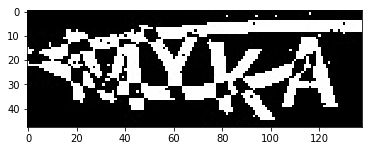

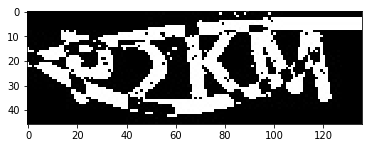

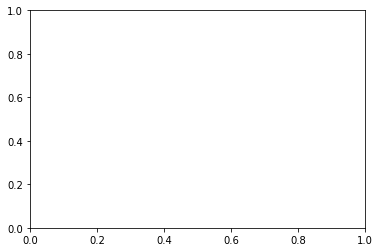

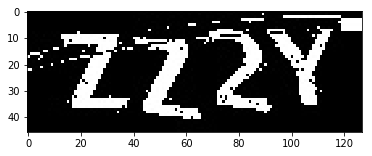

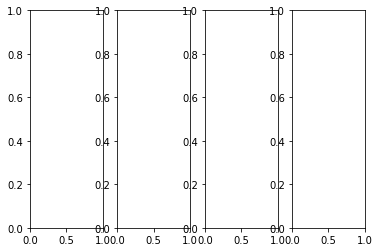

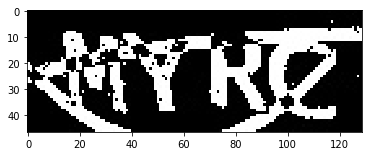

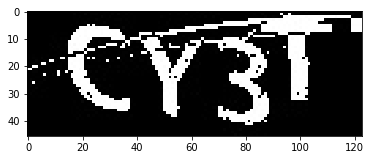

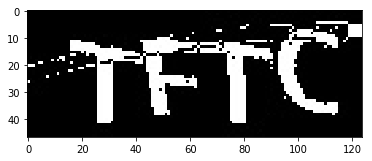

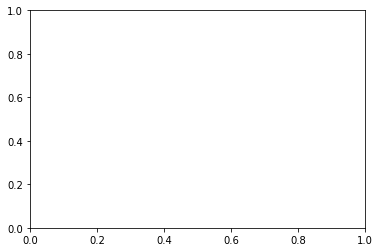

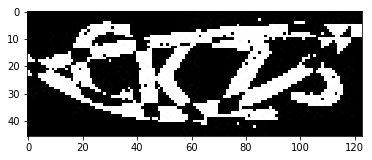

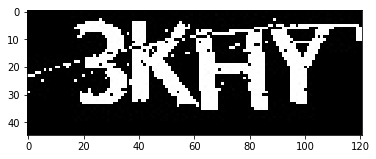

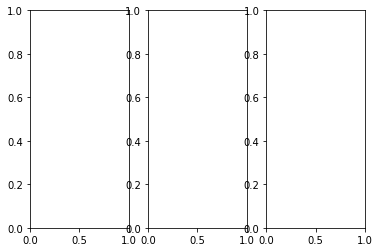

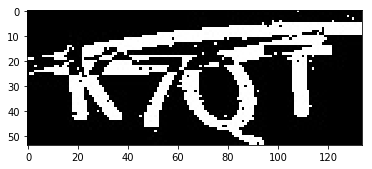

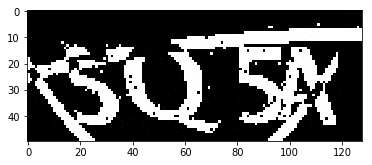

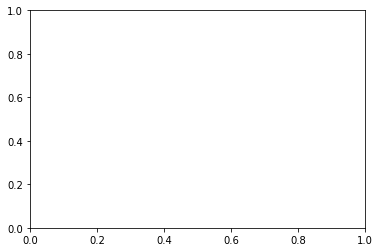

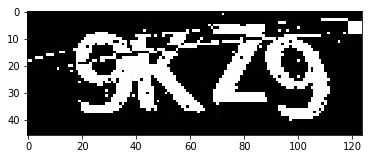

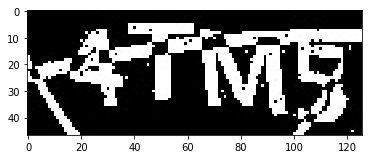

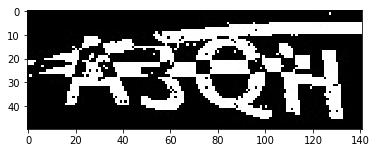

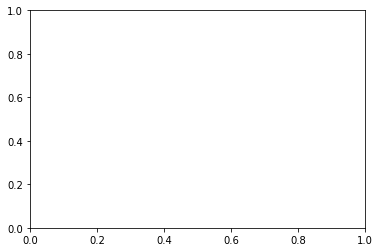

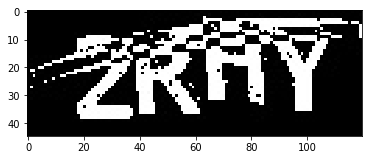

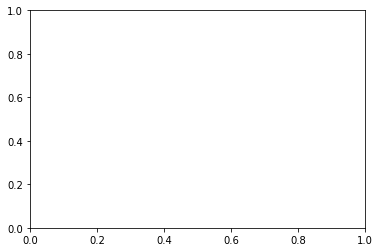

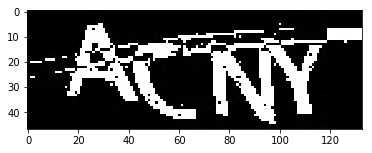

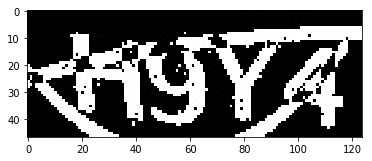

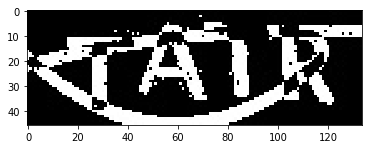

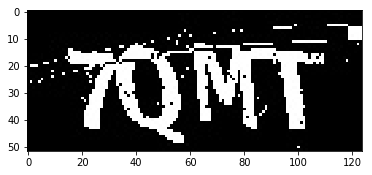

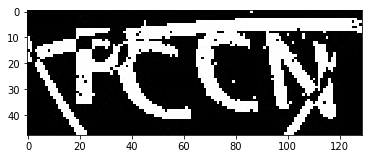

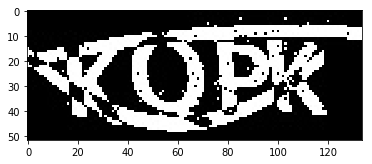

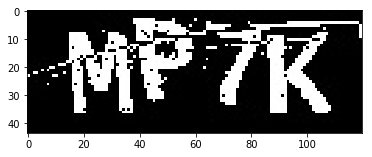

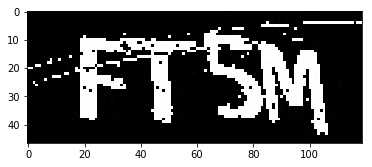

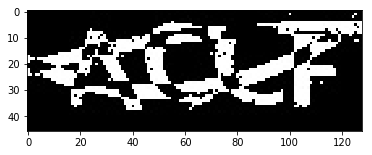

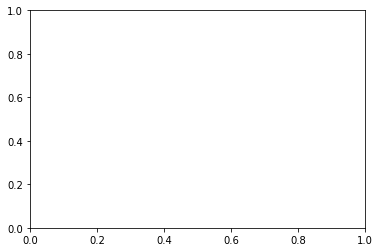

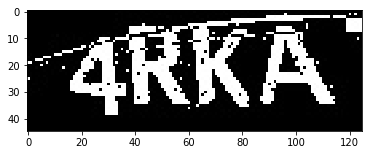

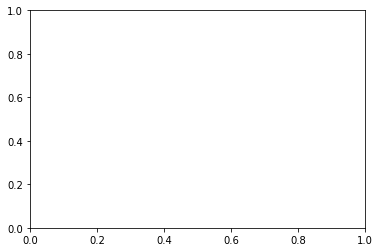

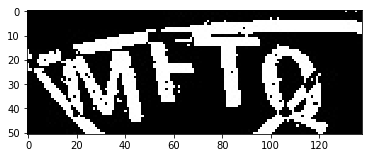

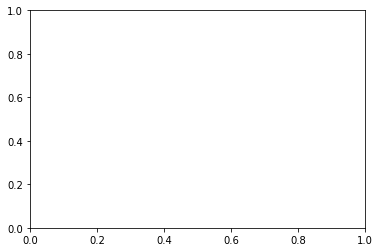

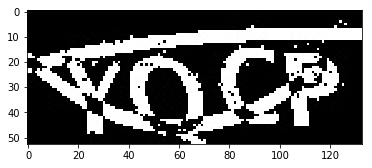

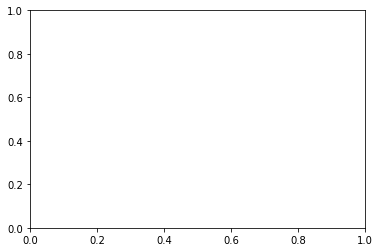

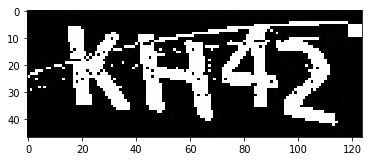

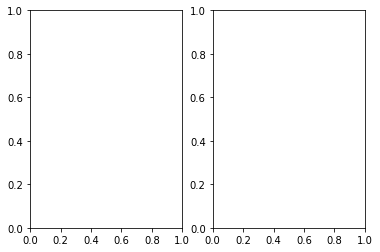

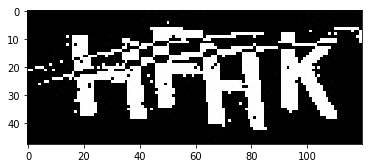

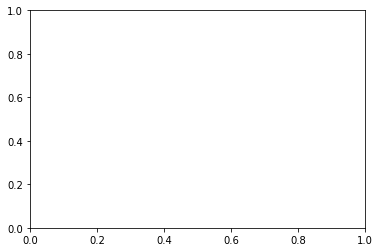

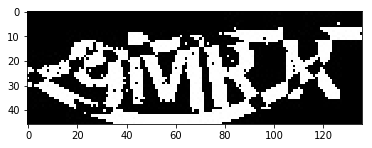

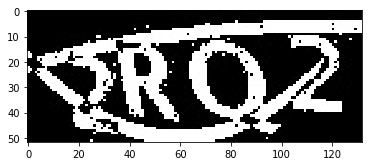

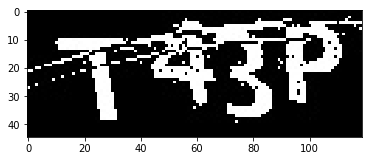

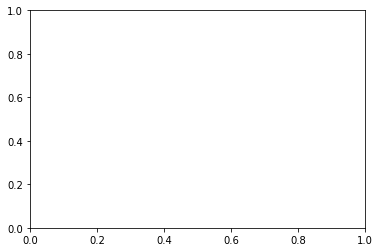

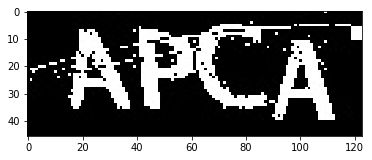

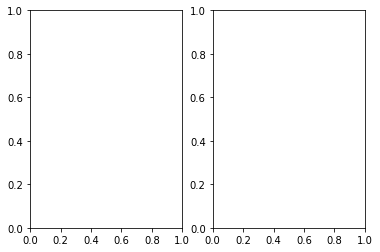

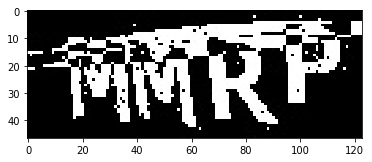

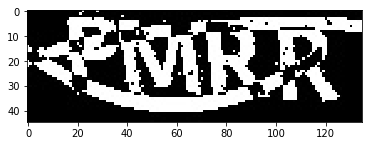

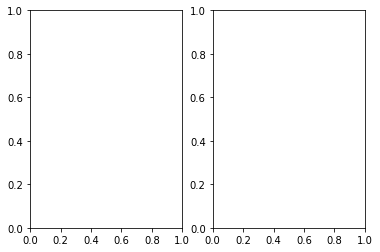

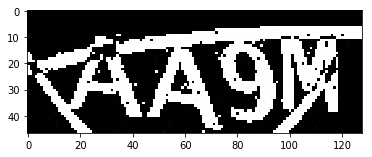

In [27]:
for i in range(50):
    try:
        image_crawler()
        remove_noise()
        divide_number()
    except:
        pass